Nama : Reza Hilmi Dafa

NIM  : 24060121130044

Nama Dataset : cars_clus dan iris






**TUGAS:**





In [ ]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs  # Updated import
%matplotlib inline

import library

In [ ]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

- Ini menghasilkan dataset sintetis dengan 50 sampel (n_samples), terdistribusi di antara empat klaster dengan pusat-pusat yang telah ditentukan dan deviasi standar (cluster_std) sebesar 0,9.
- X1 berisi titik-titik data, dan y1 berisi label klaster.

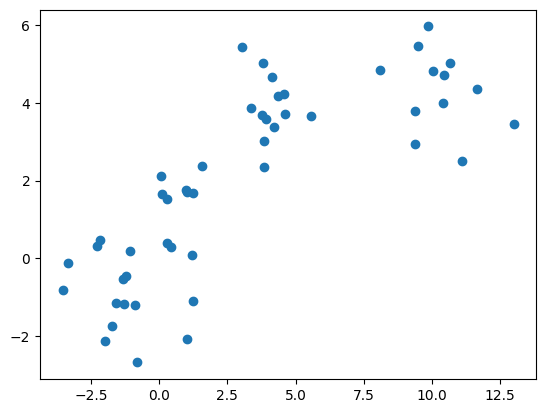

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

membuat plot scatter dari data yang dihasilkan menggunakan Matplotlib.

In [ ]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[ 0.         10.96599356  4.70244687 ...  0.46281751 10.34085217
   8.47401507]
 [10.96599356  0.          6.86890126 ... 11.07713876  0.62605095
   2.55567417]
 [ 4.70244687  6.86890126  0.         ...  4.98464589  6.27752121
   4.32332878]
 ...
 [ 0.46281751 11.07713876  4.98464589 ...  0.         10.45113233
   8.61380939]
 [10.34085217  0.62605095  6.27752121 ... 10.45113233  0.
   1.95493916]
 [ 8.47401507  2.55567417  4.32332878 ...  8.61380939  1.95493916
   0.        ]]


Menghitung matriks jarak antara titik data menggunakan jarak Euclidean.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


menyambungkan Google Drive ke Colab.

In [ ]:
filename = '/content/drive/MyDrive/MACHINE LEARNING A2/cars_clus.csv'
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


- Memuat file CSV ke dalam DataFrame Pandas.
- Kode berikutnya membersihkan dataset dengan mengonversi beberapa kolom menjadi tipe numerik, menangani nilai yang hilang, dan mereset indeks DataFrame.

In [ ]:
print ("Shape of dataset before cleaning: ",pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
      'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
      'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [ ]:
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

Memilih subset fitur untuk analisis lebih lanjut.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Menggunakan skala Min-Max untuk normalisasi nilai fitur antara 0 dan 1.

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-10-6f3580620d46>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


Menghitung matriks jarak Euclidean untuk fitur yang dinormalisasi.

# 1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!


#    **SINGLE LINKAGE**

In [ ]:
agglom_sgl = AgglomerativeClustering(n_clusters = 4, linkage = 'single')

Membuat objek model Agglomerative Clustering dengan 4 klaster (n_clusters) dan menggunakan metode penggabungan tunggal (linkage='single').

In [ ]:
agglom_sgl.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

Melatih model Agglomerative Clustering pada data X1 dengan label klaster y1.

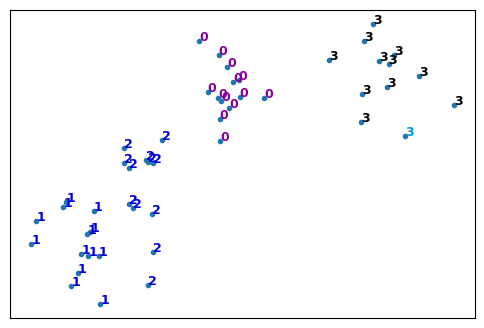

In [ ]:
#
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

#
X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
  #
  #
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
          color = plt.cm.nipy_spectral(agglom_sgl.labels_[i]/10),
          fontdict={'weight': 'bold', 'size': 9})

#
plt.xticks([])
plt.yticks([])
#plt.axis('off')

#Display
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

- Membuat gambar plot dengan ukuran 6x4.
- Menormalisasi data X1 untuk memastikan rentang nilai antara 0 dan 1.
- Melakukan loop pada setiap titik data dan menandai titik tersebut pada scatter plot dengan warna sesuai dengan klaster yang ditentukan oleh model Agglomerative Clustering.
-Mengatur parameter plot, seperti menghilangkan label sumbu dan menampilkan scatter plot dengan titik-titik data yang sudah diberi warna berdasarkan klaster.

In [ ]:
X = hierarchy.linkage(dist_matrix, 'single')

<ipython-input-14-a407336d0592>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')


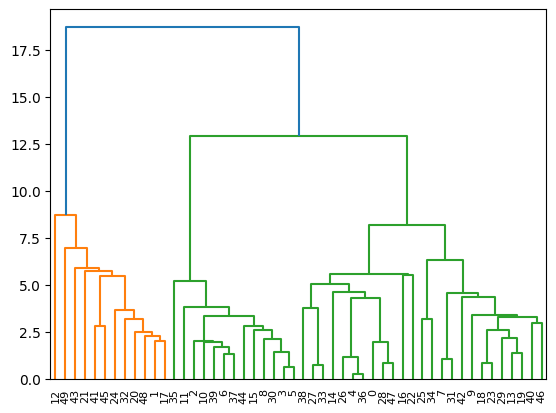

In [ ]:
dendro2 = hierarchy.dendrogram(X)

Membuat dendrogram menggunakan matriks jarak (dist_matrix) dengan metode penggabungan tunggal.

**Penjelasan** :
- **kode di atas melibatkan pengelompokan hierarki aglomeratif dengan metode single linkage dan visualisasi hasilnya menggunakan scatter plot dan dendrogram. Titik-titik pada scatter plot diberi warna sesuai dengan klaster yang dihasilkan oleh model.**

#    **AVERAGE LINKAGE**

In [ ]:
agglom_avg = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

Membuat objek model Agglomerative Clustering dengan 4 klaster (n_clusters) dan menggunakan metode penggabungan rata-rata (linkage='average').

In [ ]:
agglom_avg.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

Melatih model Agglomerative Clustering pada data X1 dengan label klaster y1.

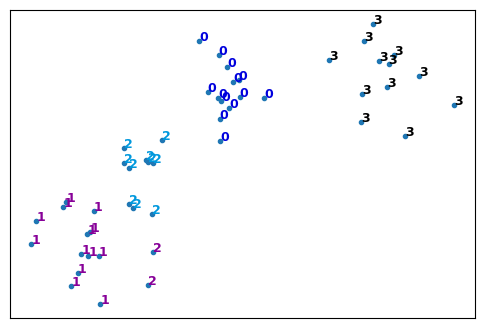

In [ ]:
#
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

#
X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
  #
  #
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
          color = plt.cm.nipy_spectral(agglom_avg.labels_[i]/10),
          fontdict={'weight': 'bold', 'size': 9})

#
plt.xticks([])
plt.yticks([])
#plt.axis('off')

#Display
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

- Membuat gambar plot dengan ukuran 6x4.
- Menormalisasi data X1 untuk memastikan rentang nilai antara 0 dan 1.
- Melakukan loop pada setiap titik data dan menandai titik tersebut pada scatter plot dengan warna sesuai dengan klaster yang ditentukan oleh model Agglomerative Clustering.
- Mengatur parameter plot, seperti menghilangkan label sumbu dan menampilkan scatter plot dengan titik-titik data yang sudah diberi warna berdasarkan klaster.

In [ ]:
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-19-5a865778cb4f>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


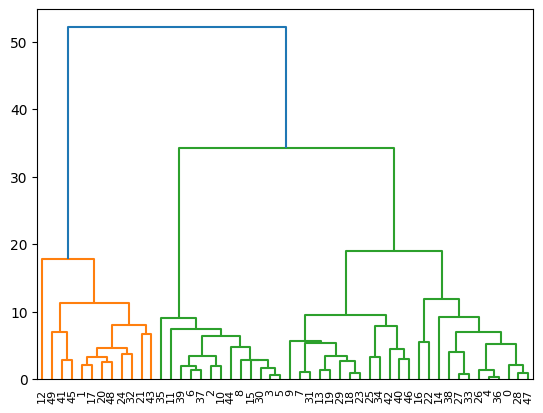

In [ ]:
dendro3 = hierarchy.dendrogram(Y)

Membuat dendrogram menggunakan matriks jarak (dist_matrix) dengan metode penggabungan rata-rata.

**Penjelasan:**
**- kode di atas melibatkan pengelompokan hierarki aglomeratif dengan metode average linkage dan visualisasi hasilnya menggunakan scatter plot dan dendrogram. Titik-titik pada scatter plot diberi warna sesuai dengan klaster yang dihasilkan oleh model.**


# **2.Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!**

# SINGLE LINKAGE

In [ ]:
import pylab
import scipy.cluster.hierarchy
X = hierarchy.linkage(D, 'single')

<ipython-input-21-5022afe30a5a>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')


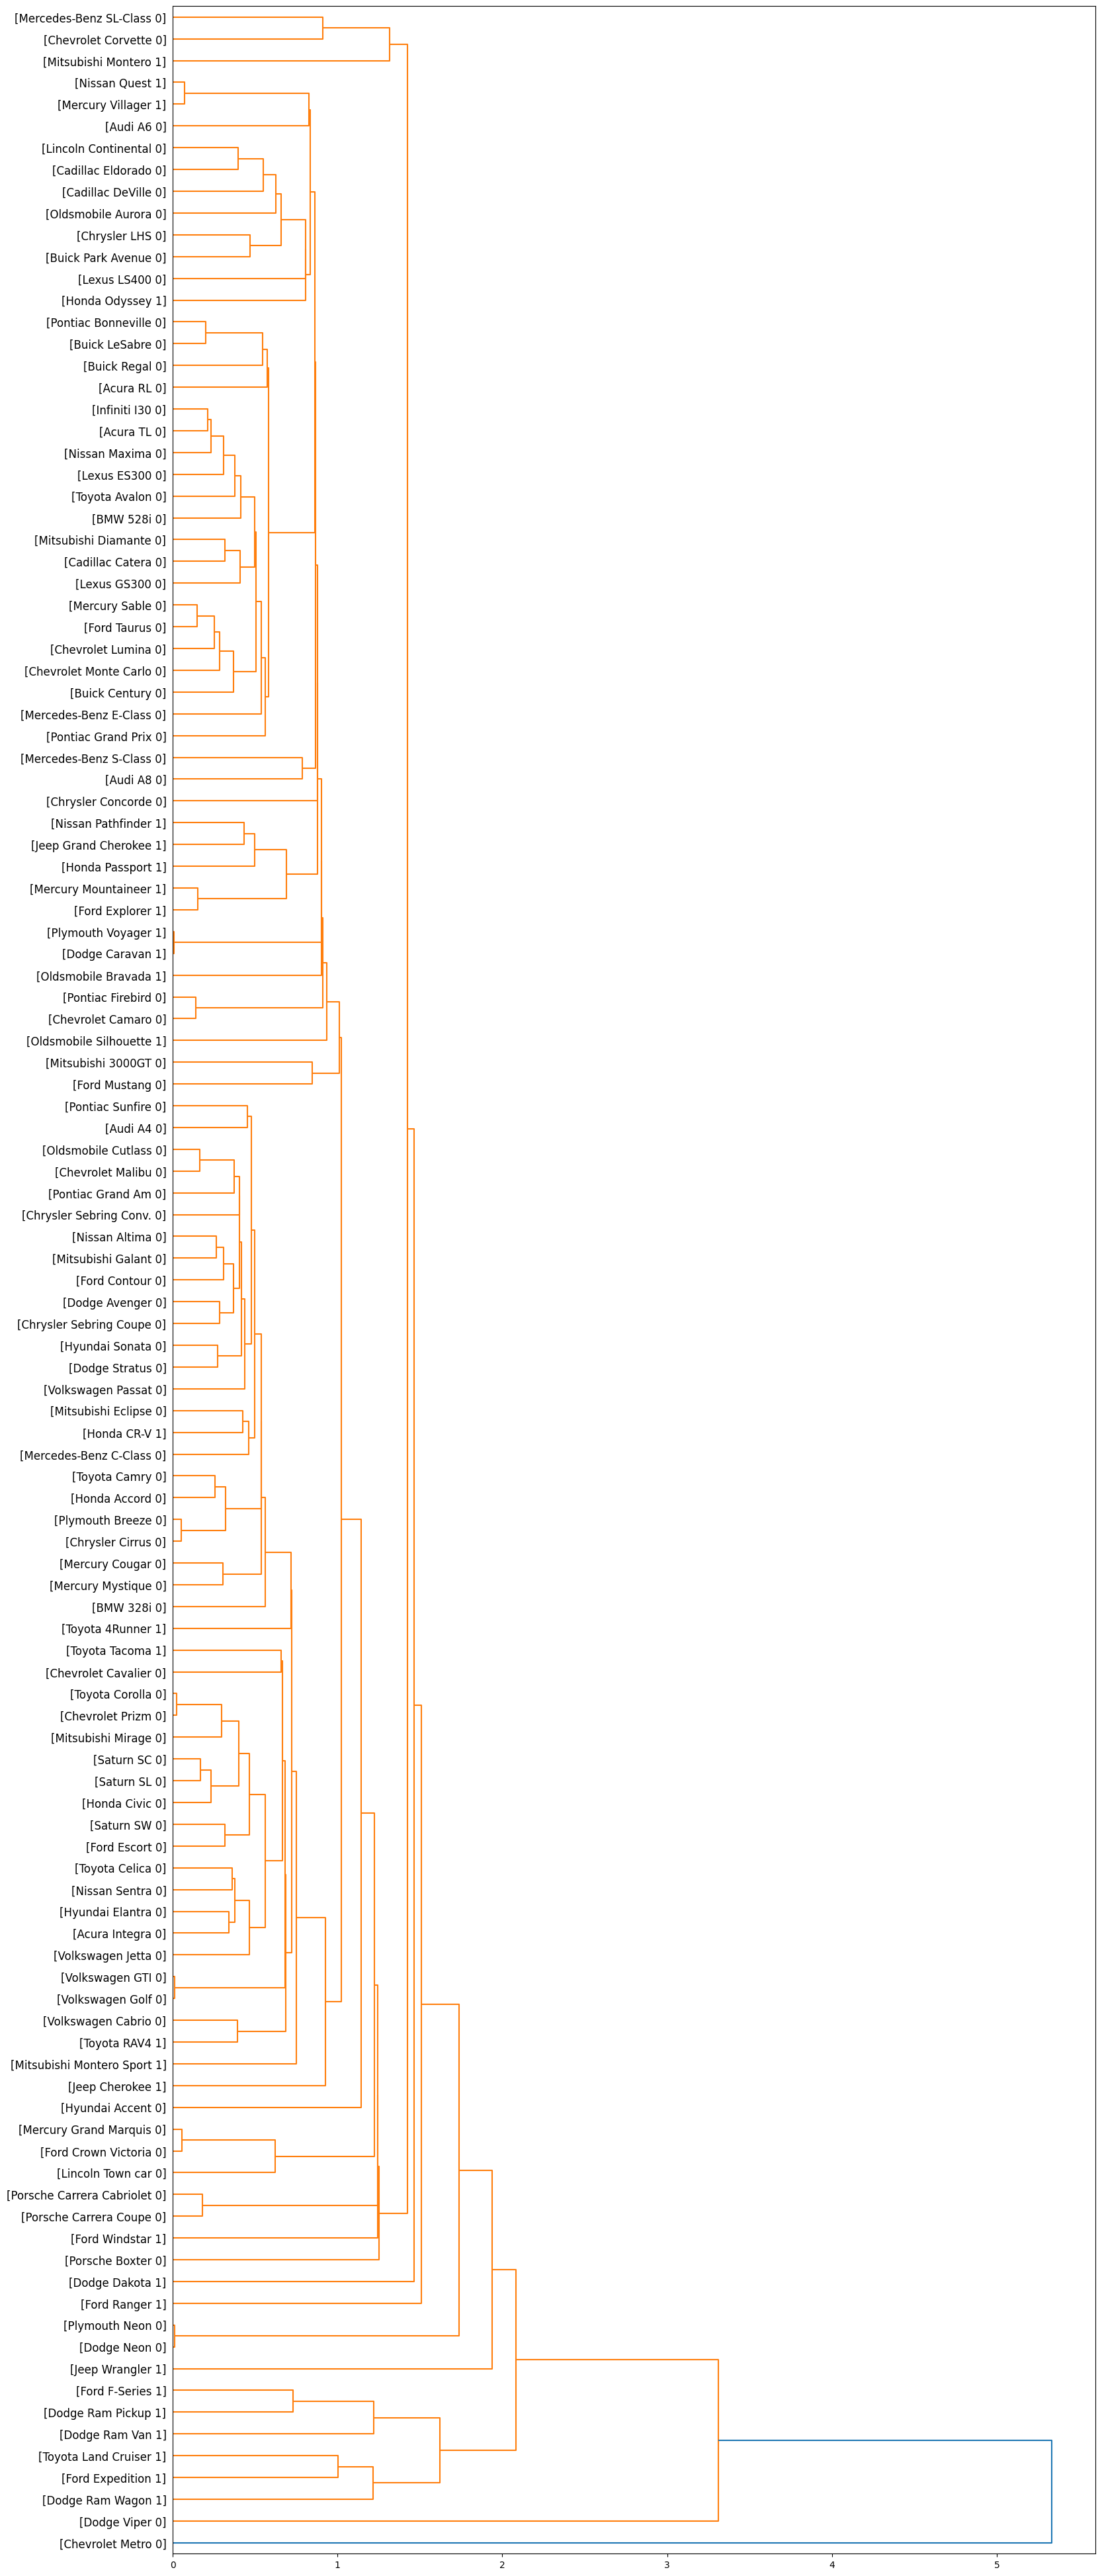

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(X, leaf_label_func=llf, leaf_rotation=0, leaf_font_size = 12, orientation = 'right')

Membuat dendrogram menggunakan matriks jarak D dengan metode penggabungan tunggal. Label daun (leaf) diberikan oleh fungsi llf yang menggabungkan informasi dari kolom 'manufact', 'model', dan 'type' dalam DataFrame

In [ ]:
agglom_sgl.fit(feature_mtx)
agglom_sgl.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
pdf['cluster_sgl'] = agglom_sgl.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_sgl
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


Melatih model Agglomerative Clustering dengan metode penggabungan tunggal pada data feature_mtx dan menambahkan kolom 'cluster_sgl' ke DataFrame pdf

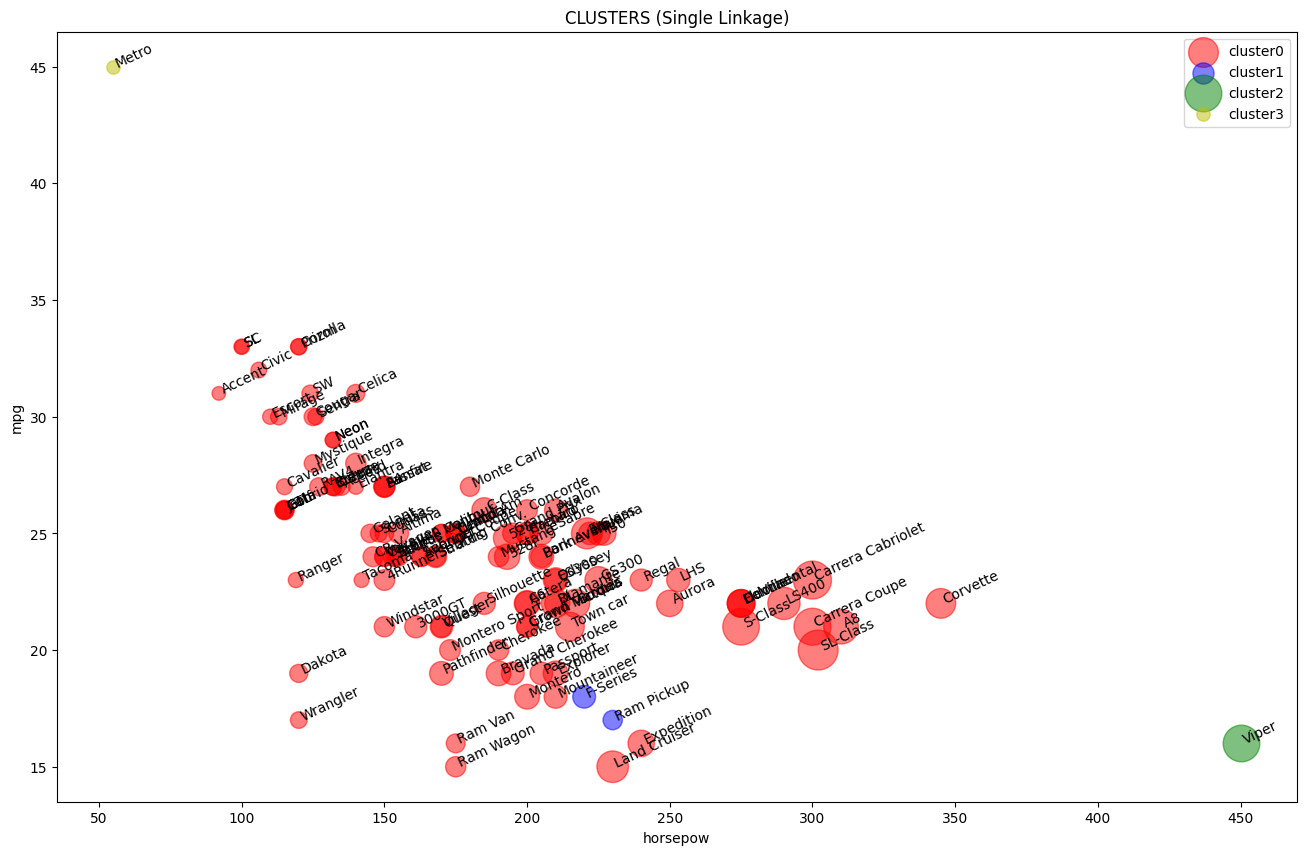

In [ ]:
import matplotlib.cm as cm
n_clusters_sgl = 4
colors_sgl = ['r', 'b', 'g', 'y']
cluster_labels_sgl = list(range(0, n_clusters_sgl))

plt.figure(figsize=(16, 10))

for color, label in zip(colors_sgl, cluster_labels_sgl):
    subset = pdf[pdf.cluster_sgl == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('CLUSTERS (Single Linkage)')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show()

Membuat scatter plot untuk visualisasi klaster dengan menggunakan data 'horsepow', 'mpg', dan 'price' dari DataFrame pdf. Setiap titik data ditandai dengan model mobil, dan ukuran titik bergantung pada harga mobil.

In [ ]:
pdf.groupby(['cluster_sgl', 'type'])['cluster_sgl'].count()

cluster_sgl  type
0            0.0     86
             1.0     27
1            1.0      2
2            0.0      1
3            0.0      1
Name: cluster_sgl, dtype: int64

Menghitung jumlah mobil dalam setiap klaster berdasarkan tipe mobil.

In [ ]:
agg_cars = pdf.groupby(['cluster_sgl','type'])['horsepow', 'engine_s','mpg', 'price' ].mean()
agg_cars

<ipython-input-27-4f67e8bd807f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_sgl','type'])['horsepow', 'engine_s','mpg', 'price' ].mean()


horsepow  engine_s        mpg      price
cluster_sgl type                                            
0           0.0   181.197674  2.902326  25.358140  26.286779
            1.0   173.037037  3.270370  20.185185  24.163407
1           1.0   225.000000  4.900000  17.500000  23.197500
2           0.0   450.000000  8.000000  16.000000  69.725000
3           0.0    55.000000  1.000000  45.000000   9.235000

Menghitung rata-rata fitur seperti 'horsepow', 'engine_s', 'mpg', dan 'price' untuk setiap klaster dan tipe mobil.

Text(0, 0.5, 'mpg')

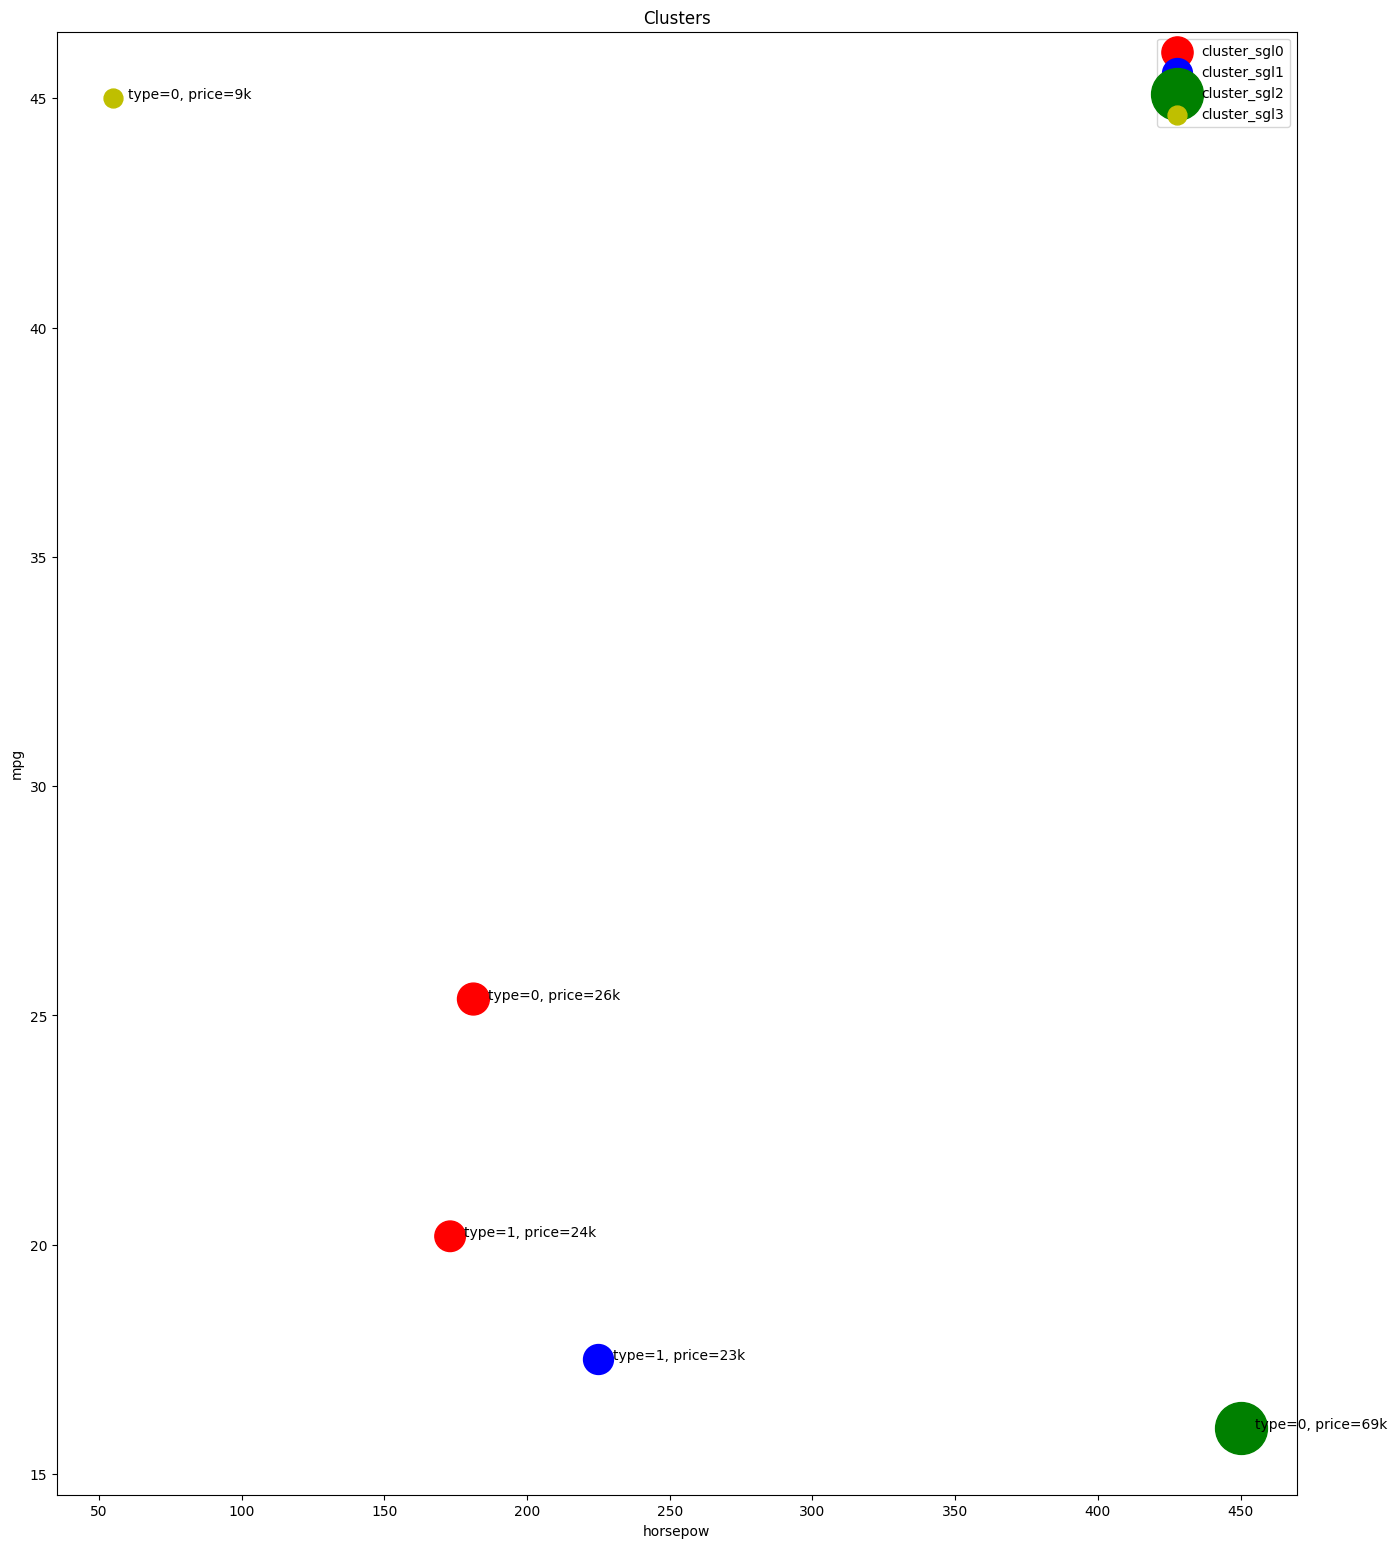

In [ ]:
plt.figure(figsize=(16,19))
for color, label in zip(colors_sgl, cluster_labels_sgl):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster_sgl'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Membuat scatter plot untuk visualisasi rata-rata fitur pada setiap klaster. Ukuran titik bergantung pada harga mobil, dan teks ditambahkan untuk menunjukkan tipe dan harga mobil.

**Penjelasan:**
- **kode di atas melibatkan pembuatan dendrogram, pengelompokan dengan metode single linkage, visualisasi klaster pada scatter plot, analisis jumlah mobil dalam setiap klaster, analisis rata-rata fitur untuk setiap klaster dan tipe mobil, serta visualisasi rata-rata fitur pada scatter plot.**

# AVERAGE LINKAGE

In [ ]:
import pylab
import scipy.cluster.hierarchy
Y = hierarchy.linkage(D, 'average')

<ipython-input-29-620bd6fa0641>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


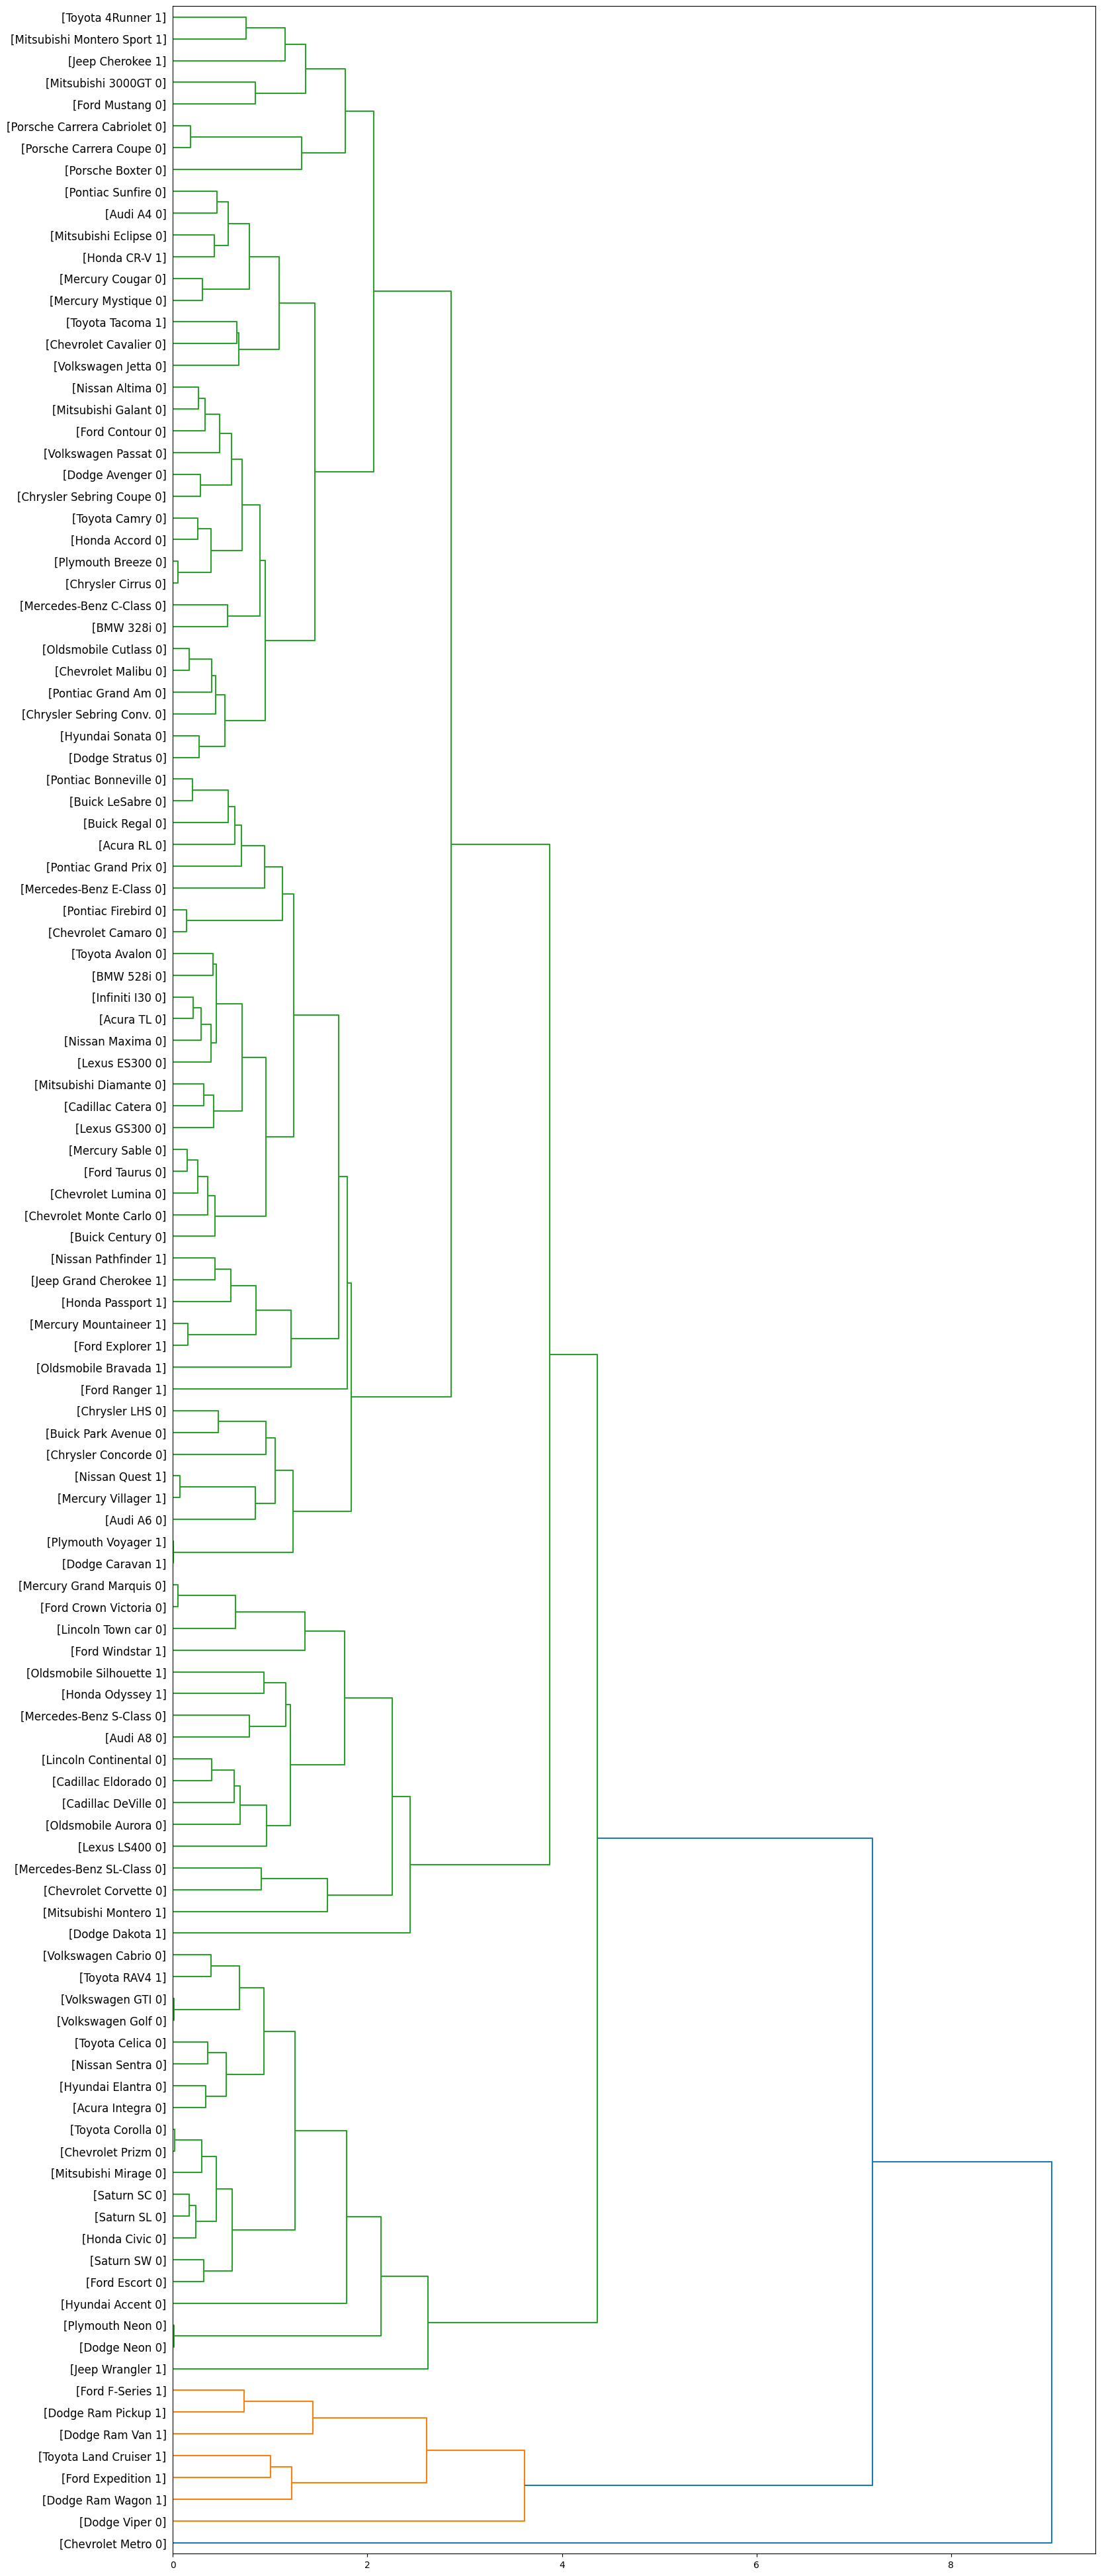

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(Y, leaf_label_func=llf, leaf_rotation=0, leaf_font_size = 12, orientation = 'right')

Membuat dendrogram menggunakan matriks jarak D dengan metode penggabungan rata-rata. Label daun (leaf) diberikan oleh fungsi llf yang menggabungkan informasi dari kolom 'manufact', 'model', dan 'type' dalam DataFrame pdf.

In [ ]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Menghitung matriks jarak antar titik pada data yang telah dinormalisasi (feature_mtx).

In [ ]:
agglom_avg.fit(feature_mtx)
agglom_avg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [ ]:
pdf['cluster_avg'] = agglom_avg.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_sgl,cluster_avg
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0,0


Melatih model Agglomerative Clustering dengan metode penggabungan rata-rata pada data yang telah dinormalisasi dan menambahkan kolom 'cluster_avg' ke DataFrame pdf.

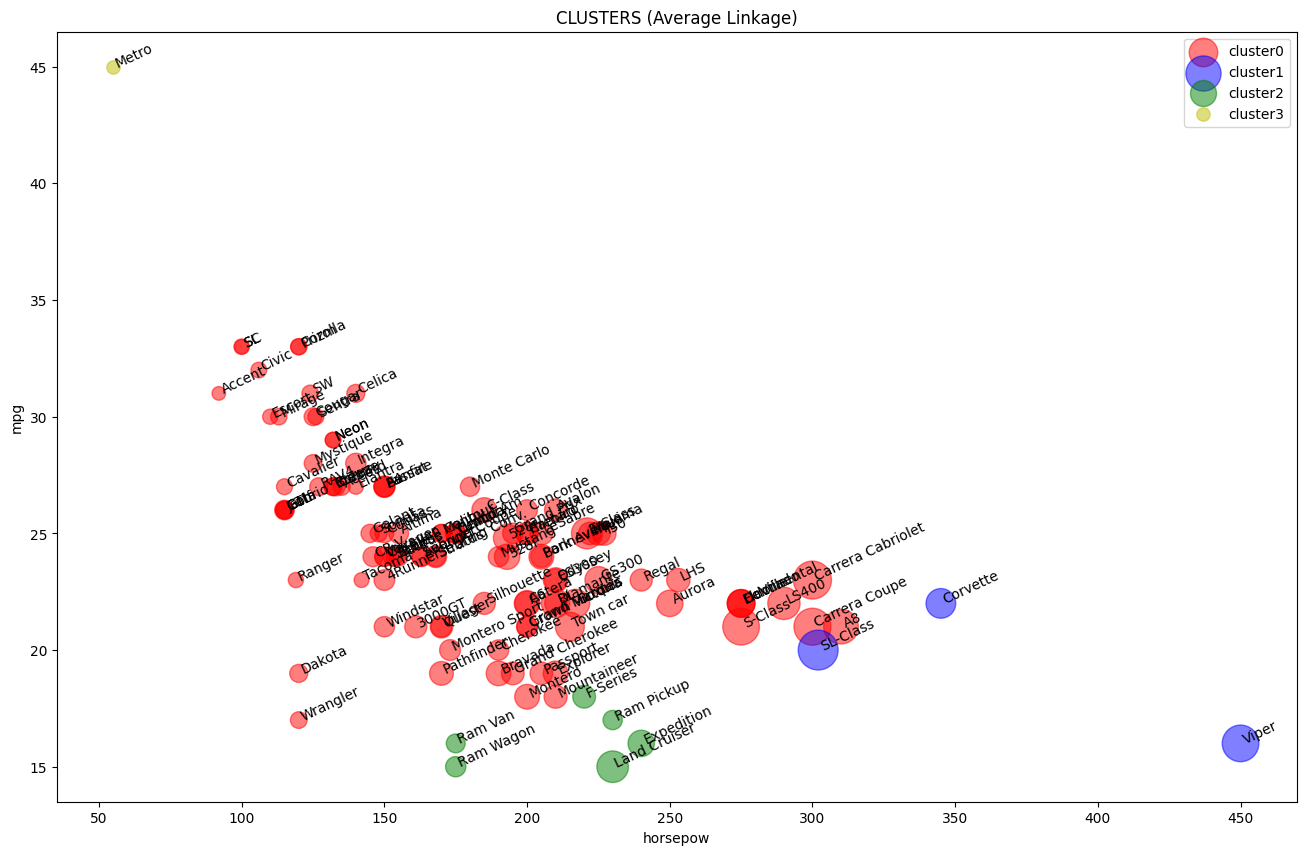

In [ ]:
import matplotlib.cm as cm
n_clusters_avg = 4
colors_avg = ['r', 'b', 'g', 'y']
cluster_labels_avg = list(range(0, n_clusters_avg))

plt.figure(figsize=(16, 10))

for color, label in zip(colors_avg, cluster_labels_avg):
    subset = pdf[pdf.cluster_avg == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('CLUSTERS (Average Linkage)')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show()

Membuat scatter plot untuk visualisasi klaster dengan menggunakan data 'horsepow', 'mpg', dan 'price' dari DataFrame pdf. Setiap titik data ditandai dengan model mobil, dan ukuran titik bergantung pada harga mobil.

In [ ]:
pdf.groupby(['cluster_avg', 'type'])['cluster_avg'].count()

cluster_avg  type
0            0.0     84
             1.0     23
1            0.0      3
2            1.0      6
3            0.0      1
Name: cluster_avg, dtype: int64

Menghitung jumlah mobil dalam setiap klaster berdasarkan tipe mobil.

In [ ]:
agg_cars = pdf.groupby(['cluster_avg','type'])['horsepow', 'engine_s','mpg', 'price' ].mean()
agg_cars

<ipython-input-36-f642cb2349ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_avg','type'])['horsepow', 'engine_s','mpg', 'price' ].mean()


horsepow  engine_s        mpg      price
cluster_avg type                                            
0           0.0   177.809524  2.844048  25.461905  25.385214
            1.0   167.478261  3.095652  21.000000  22.811261
1           0.0   365.666667  6.233333  19.333333  66.010000
2           1.0   211.666667  4.483333  16.166667  29.024667
3           0.0    55.000000  1.000000  45.000000   9.235000

Menghitung rata-rata fitur seperti 'horsepow', 'engine_s', 'mpg', dan 'price' untuk setiap klaster dan tipe mobil.

Text(0, 0.5, 'mpg')

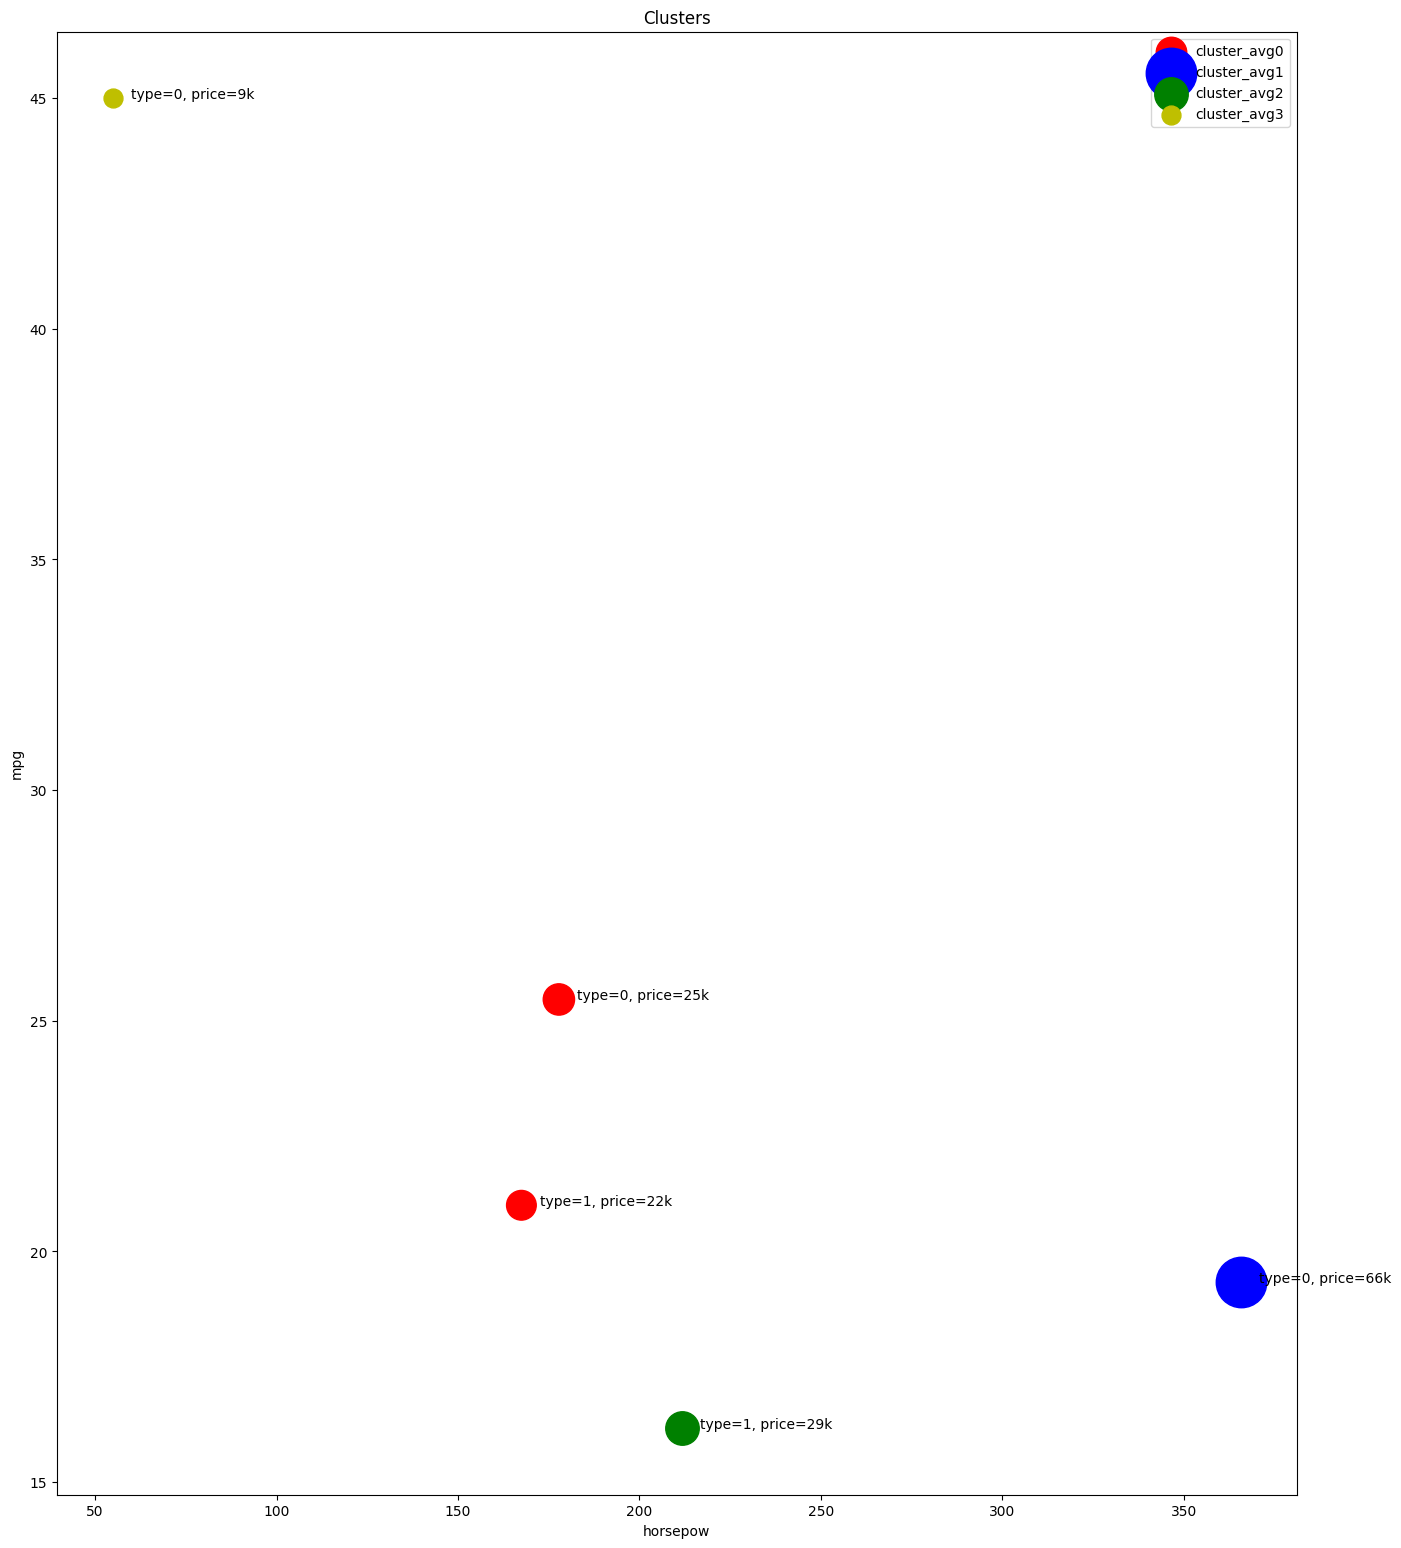

In [ ]:
plt.figure(figsize=(16,19))
for color, label in zip(colors_avg, cluster_labels_avg):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster_avg'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Membuat scatter plot untuk visualisasi rata-rata fitur pada setiap klaster. Ukuran titik bergantung pada harga mobil, dan teks ditambahkan untuk menunjukkan tipe dan harga mobil.

**Penjelasan:**
- **kode di atas melibatkan pembuatan dendrogram, pengelompokan dengan metode penggabungan rata-rata, visualisasi klaster pada scatter plot, analisis jumlah mobil dalam setiap klaster, analisis rata-rata fitur untuk setiap klaster dan tipe mobil, serta visualisasi rata-rata fitur pada scatter plot.**

# **3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset iris! Jelaskan perbedaannya!**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, names=names)

- Mengunduh data Iris dari UCI Machine Learning Repository dan membacanya ke dalam DataFrame data.
- Memberikan nama kolom menggunakan list names.

In [ ]:
print ("Shape of dataset: ", data.shape)

data.head(5)

Shape of dataset:  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

Menampilkan bentuk (shape) dataset, lima baris pertama, dan tipe data dari setiap kolom.

Karena data sudah sempurna atau tidak ada missing value, maka tidak perlu dilakukan pembersihan data atau cleaning


In [ ]:
featureset = data[[ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

Memilih fitur untuk analisis dan melakukan normalisasi menggunakan Min-Max Scaler.

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-42-7641c8e41239>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng, leng])


Menghitung matriks jarak antar titik data setelah normalisasi.

In [ ]:
import pylab
import scipy.cluster.hierarchy
X = hierarchy.linkage(D, 'single')
Y = hierarchy.linkage(D, 'average')
Z = hierarchy.linkage(D, 'complete')

<ipython-input-43-7dcf7458476e>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')
<ipython-input-43-7dcf7458476e>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')
<ipython-input-43-7dcf7458476e>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


Membuat dendrogram dengan metode penggabungan tunggal, rata-rata, dan complete.

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['sepal_length'][id], data['sepal_width'][id], data['class'][id])

<Figure size 1800x5000 with 0 Axes>

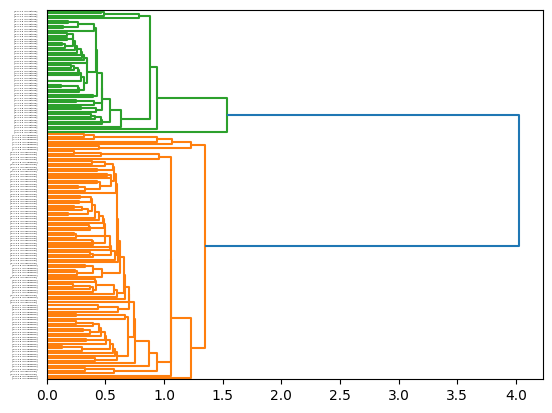

In [ ]:
dendro = hierarchy.dendrogram(X, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =1.75, orientation = 'right')

Menampilkan dendrogram dengan single linkage.

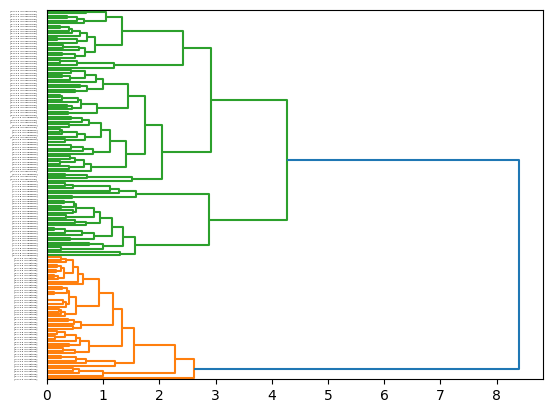

In [ ]:
dendro = hierarchy.dendrogram(Y, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =1.75, orientation = 'right')

Menampilkan dendrogram dengan average linkage.

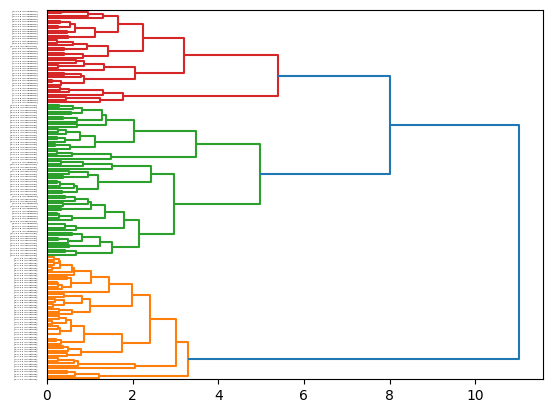

In [ ]:
dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =1.75, orientation = 'right')

Menampilkan dendrogram dengan complete linkage.

In [ ]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


menghitung matriks jarak antar titik pada data yang telah dinormalisasi (feature_mtx).

In [ ]:
agglom_sgl = AgglomerativeClustering(n_clusters = 3, linkage = 'single')
agglom_sgl.fit(feature_mtx)
agglom_sgl.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Melatih model Agglomerative Clustering dengan metode single linkage.

In [ ]:
agglom_avg = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
agglom_avg.fit(feature_mtx)
agglom_avg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Melatih model Agglomerative Clustering dengan metode average linkage.

In [ ]:
agglom_com = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom_com.fit(feature_mtx)
agglom_com.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

Melatih model Agglomerative Clustering dengan metode complete linkage.

In [ ]:
data['cluster_sgl'] = agglom_sgl.labels_
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,cluster_sgl,cluster_avg,cluster_com
0,5.1,3.5,1.4,0.2,Iris-setosa,2,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,2,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,2,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,2,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,2,0,0


Menambahkan kolom dengan label klaster ke DataFrame data.

In [ ]:
data['cluster_avg'] = agglom_avg.labels_
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,cluster_sgl,cluster_avg,cluster_com
0,5.1,3.5,1.4,0.2,Iris-setosa,2,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,2,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,2,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,2,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,2,0,0


Menambahkan kolom dengan label klaster ke DataFrame data.

In [ ]:
data['cluster_com'] = agglom_com.labels_
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,cluster_sgl,cluster_avg,cluster_com
0,5.1,3.5,1.4,0.2,Iris-setosa,2,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,2,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,2,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,2,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,2,0,0


Menambahkan kolom dengan label klaster ke DataFrame data.

In [ ]:
data.groupby(['cluster_sgl', 'class'])['cluster_sgl'].count()

cluster_sgl  class          
0            Iris-versicolor    50
             Iris-virginica     50
1            Iris-setosa         1
2            Iris-setosa        49
Name: cluster_sgl, dtype: int64

Menghitung jumlah elemen dalam setiap klaster untuk setiap kelas Iris.

In [ ]:
data.groupby(['cluster_avg', 'class'])['cluster_avg'].count()

cluster_avg  class          
0            Iris-setosa        50
1            Iris-versicolor    50
             Iris-virginica     17
2            Iris-virginica     33
Name: cluster_avg, dtype: int64

Menghitung jumlah elemen dalam setiap klaster untuk setiap kelas Iris.

In [ ]:
data.groupby(['cluster_com', 'class'])['cluster_com'].count()

cluster_com  class          
0            Iris-setosa        50
1            Iris-versicolor     1
             Iris-virginica     33
2            Iris-versicolor    49
             Iris-virginica     17
Name: cluster_com, dtype: int64

Menghitung jumlah elemen dalam setiap klaster untuk setiap kelas Iris.

In [ ]:
agg_iris = data.groupby(['cluster_sgl','class'])['sepal_length', 'sepal_width','petal_length', 'petal_width' ].mean()
agg_iris

<ipython-input-76-2ee4aff0f3ce>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris = data.groupby(['cluster_sgl','class'])['sepal_length', 'sepal_width','petal_length', 'petal_width' ].mean()


sepal_length  sepal_width  petal_length  \
cluster_sgl class                                                      
0           Iris-versicolor      5.936000     2.770000      4.260000   
            Iris-virginica       6.588000     2.974000      5.552000   
1           Iris-setosa          4.500000     2.300000      1.300000   
2           Iris-setosa          5.016327     3.440816      1.467347   

                             petal_width  
cluster_sgl class                         
0           Iris-versicolor     1.326000  
            Iris-virginica      2.026000  
1           Iris-setosa         0.300000  
2           Iris-setosa         0.242857

Menghitung rata-rata fitur untuk setiap klaster dan kelas Iris.

In [ ]:
agg_iris = data.groupby(['cluster_avg','class'])['sepal_length', 'sepal_width','petal_length', 'petal_width' ].mean()
agg_iris

<ipython-input-77-e1854db73e5b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris = data.groupby(['cluster_avg','class'])['sepal_length', 'sepal_width','petal_length', 'petal_width' ].mean()


sepal_length  sepal_width  petal_length  \
cluster_avg class                                                      
0           Iris-setosa          5.006000     3.418000      1.464000   
1           Iris-versicolor      5.936000     2.770000      4.260000   
            Iris-virginica       5.994118     2.694118      5.058824   
2           Iris-virginica       6.893939     3.118182      5.806061   

                             petal_width  
cluster_avg class                         
0           Iris-setosa         0.244000  
1           Iris-versicolor     1.326000  
            Iris-virginica      1.817647  
2           Iris-virginica      2.133333

Menghitung rata-rata fitur untuk setiap klaster dan kelas Iris.

In [ ]:
agg_iris = data.groupby(['cluster_com','class'])['sepal_length', 'sepal_width','petal_length', 'petal_width' ].mean()
agg_iris

<ipython-input-78-d763221500a9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris = data.groupby(['cluster_com','class'])['sepal_length', 'sepal_width','petal_length', 'petal_width' ].mean()


sepal_length  sepal_width  petal_length  \
cluster_com class                                                      
0           Iris-setosa          5.006000     3.418000      1.464000   
1           Iris-versicolor      6.700000     3.000000      5.000000   
            Iris-virginica       6.893939     3.118182      5.806061   
2           Iris-versicolor      5.920408     2.765306      4.244898   
            Iris-virginica       5.994118     2.694118      5.058824   

                             petal_width  
cluster_com class                         
0           Iris-setosa         0.244000  
1           Iris-versicolor     1.700000  
            Iris-virginica      2.133333  
2           Iris-versicolor     1.318367  
            Iris-virginica      1.817647

Menghitung rata-rata fitur untuk setiap klaster dan kelas Iris.

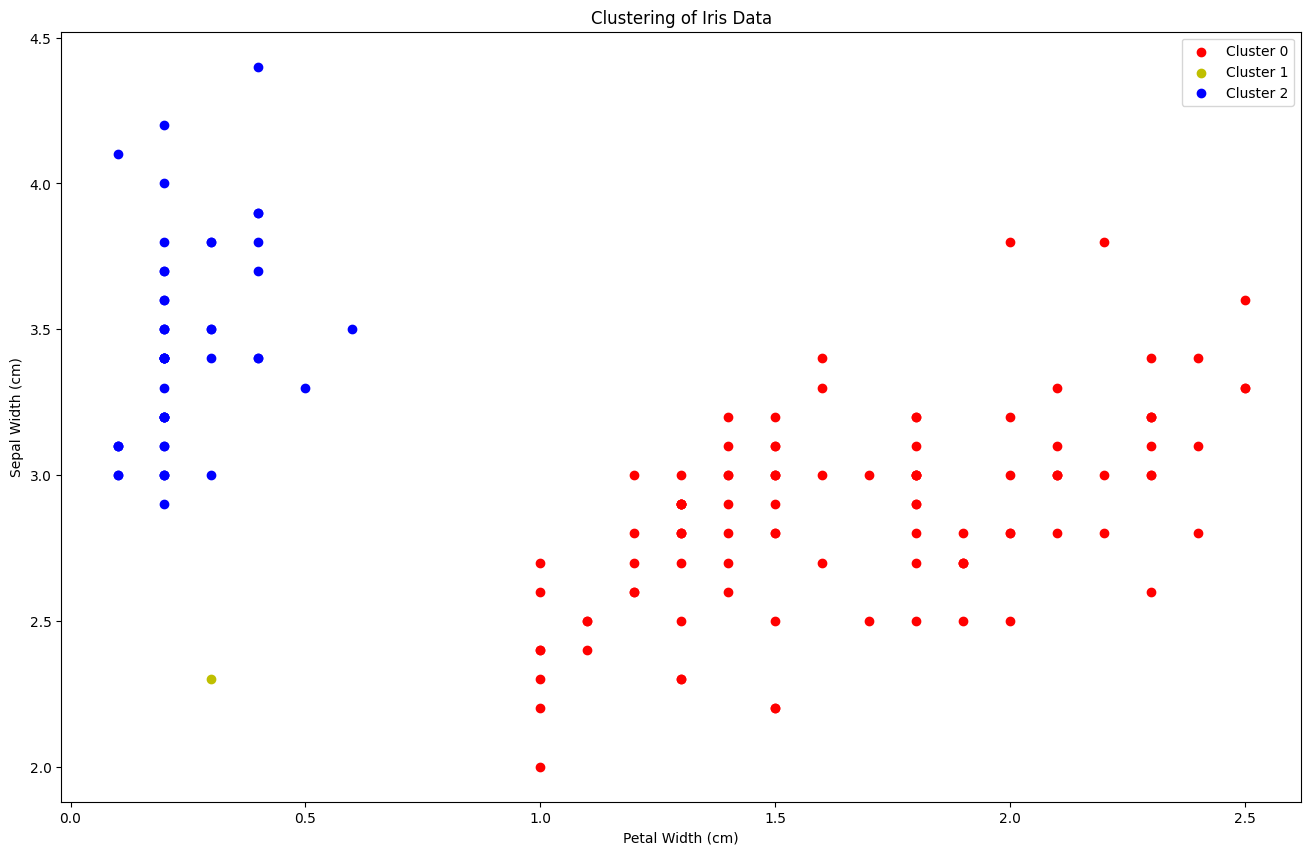

In [ ]:
import matplotlib.cm as cm
iris_clusters_sgl = 3
iris_colors_sgl = ['r', 'y', 'b']
iris_cluster_labels_sgl = list(range(0, iris_clusters_avg))

plt.figure(figsize=(16, 10))

for i in range(iris_clusters_avg):
    cluster_points = data[data['cluster_sgl'] == i]
    plt.scatter(cluster_points['petal_width'], cluster_points['sepal_width'], c=iris_colors_sgl[i], label=f'Cluster {i}')

plt.title('Clustering of Iris Data')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


Menampilkan scatter plot untuk visualisasi klaster menggunakan data yang dihasilkan dari metode single linkage.

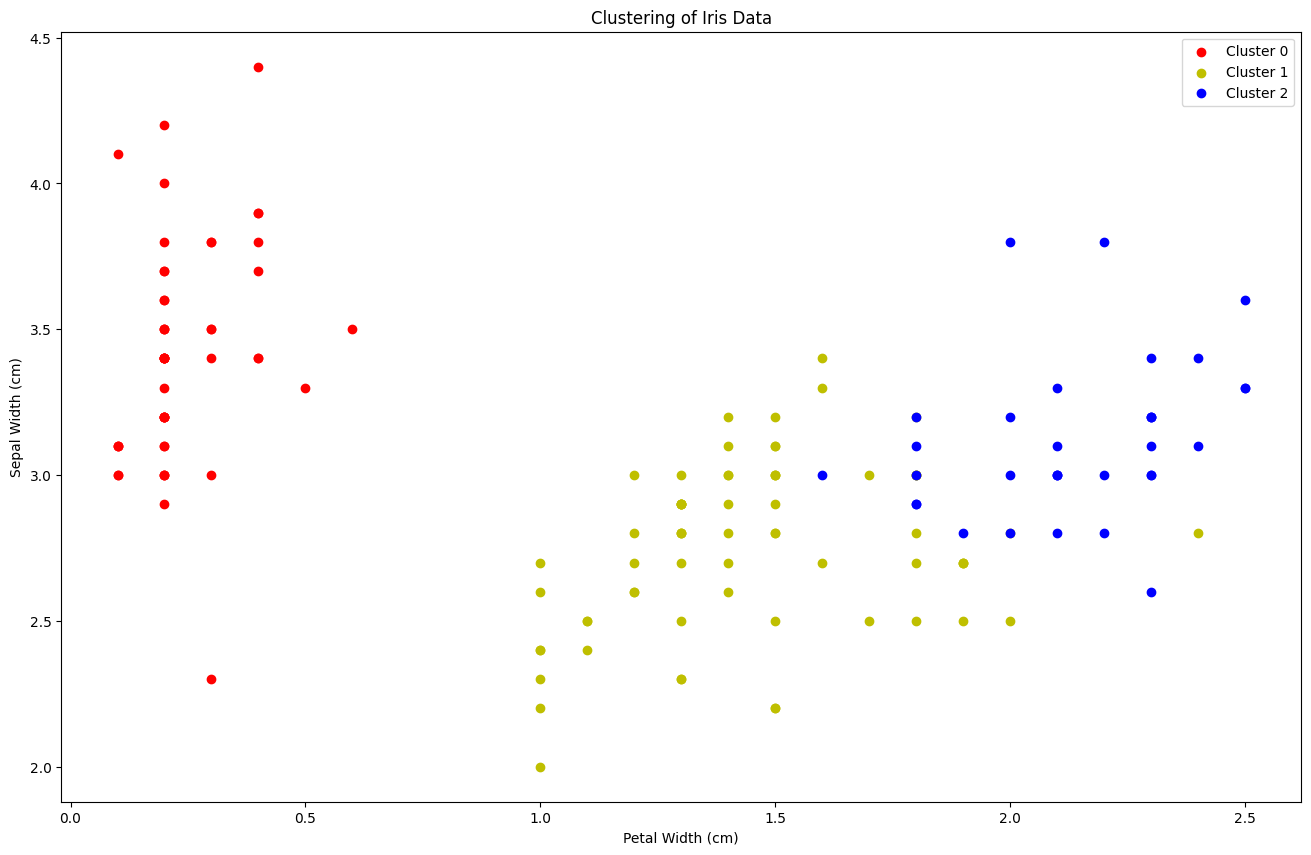

In [ ]:
import matplotlib.cm as cm
iris_clusters_avg = 3
iris_colors_avg = ['r', 'y', 'b']
iris_cluster_labels_avg = list(range(0, iris_clusters_avg))

plt.figure(figsize=(16, 10))

for i in range(iris_clusters_avg):
    cluster_points = data[data['cluster_avg'] == i]
    plt.scatter(cluster_points['petal_width'], cluster_points['sepal_width'], c=iris_colors_avg[i], label=f'Cluster {i}')

plt.title('Clustering of Iris Data')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


Menampilkan scatter plot untuk visualisasi klaster menggunakan data yang dihasilkan dari metode average linkage.

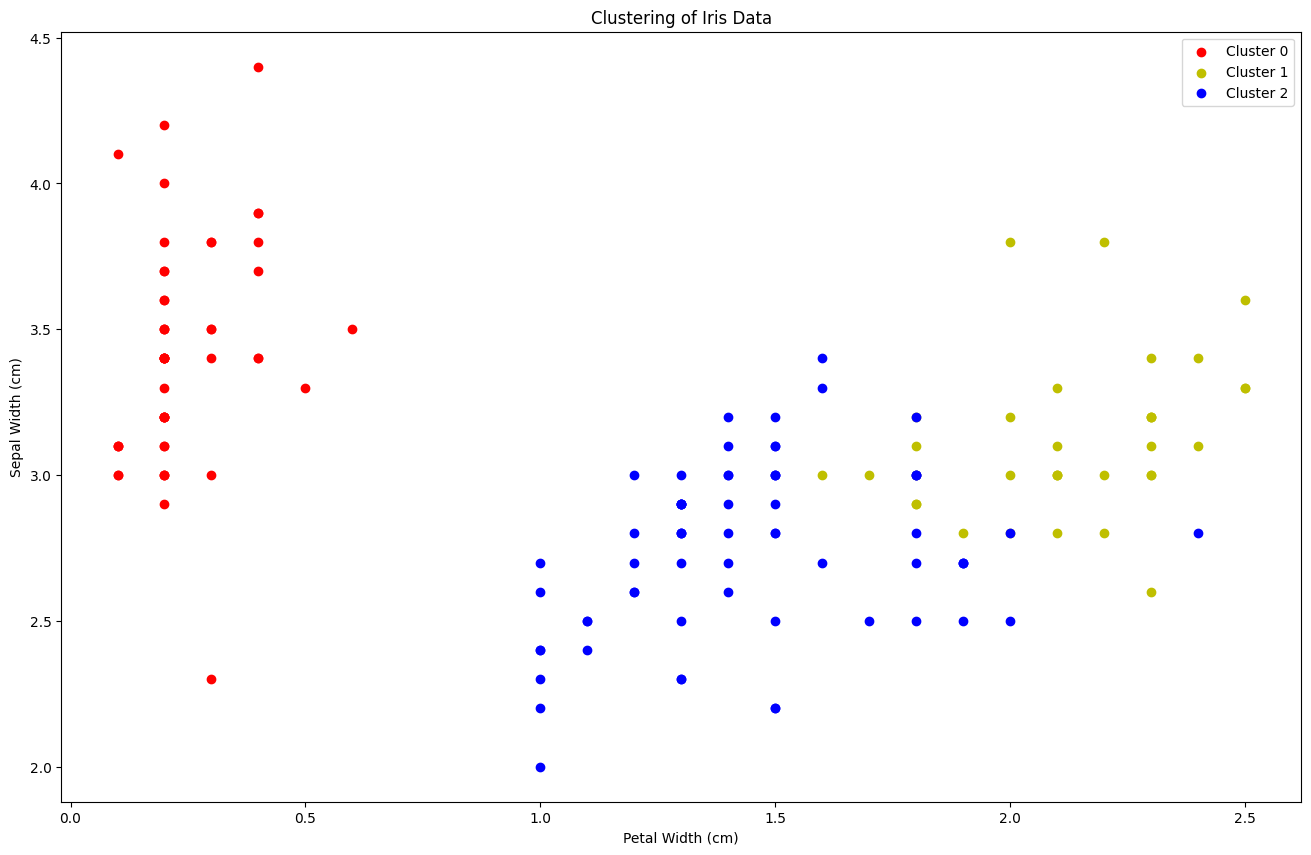

In [ ]:
import matplotlib.cm as cm
iris_clusters_com = 3
iris_colors_com = ['r', 'y', 'b']
iris_cluster_labels_com = list(range(0, iris_clusters_com))

plt.figure(figsize=(16, 10))

for i in range(iris_clusters_com):
    cluster_points = data[data['cluster_com'] == i]
    plt.scatter(cluster_points['petal_width'], cluster_points['sepal_width'], c=iris_colors_com[i], label=f'Cluster {i}')

plt.title('Clustering of Iris Data')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


Menampilkan scatter plot untuk visualisasi klaster menggunakan data yang dihasilkan dari metode complete linkage.

# KESIMPULAN
Dapat dilihat dari data yang dihasilkan dari setiap agglomerative clustering yaitu single linkage, average linkage, complete linkage memiliki nilai, data clustering dan plotting yang berbeda - beda, perbedaan dari single linkage, average linkage, complete linkage sendiri yaitu
1.	Single Linkage: Mengukur jarak antara dua klaster berdasarkan jarak terdekat antara dua sampel, satu dari setiap klaster.
2.	Average Linkage: Mengukur jarak antara dua klaster sebagai rata-rata dari semua jarak antara pasangan sampel, satu dari setiap klaster.
3.	Complete Linkage: Mengukur jarak antara dua klaster sebagai jarak terjauh antara dua sampel, satu dari setiap klaster.
Perbedaan utama antara ketiganya terletak pada cara mengukur jarak antara klaster. Single linkage cenderung menghasilkan klaster yang bergantung pada satu sampel, average linkage memberikan bobot yang sama pada semua pasangan sampel, sementara complete linkage lebih fokus pada pasangan sampel yang jaraknya paling jauh. Pilihan metode linkage dapat mempengaruhi struktur dan interpretasi hasil klastering dalam analisis hierarkis.
